# Task 1

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 

iris = load_iris()
x = iris.data
y = iris.target 

df = pd.DataFrame(x, columns=iris.feature_names)
df['target'] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Task 2

In [2]:
print("Missing Values Check")
df.isna().sum()

Missing Values Check


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Task 3

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, y, random_state=42, test_size=0.3, stratify=y
)

print(f"Training set size: {x_train.shape[0]} samples")
print(f"Testing set size: {x_test.shape[0]} samples")

Training set size: 105 samples
Testing set size: 45 samples


# Task 4-7

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
k_values = [1, 3, 5, 7, 9, 11, 15, 19] # Range of K to test
results = []
accuracies = []

# 

for k in k_values:
    # 4. Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # 5. Make predictions on the test set
    y_pred = knn.predict(x_test)

    # 6. Evaluate performance using various metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({
        'K': k,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })
    accuracies.append(acc)

# Convert results to a DataFrame for clean output
results_df = pd.DataFrame(results).set_index('K')

print("KNN Performance Evaluation Across Different K Values")
results_df

KNN Performance Evaluation Across Different K Values


,Accuracy,Precision,Recall,F1-Score
K,,,,
1,0.933333,0.944444,0.933333,0.932660
3,0.911111,0.929825,0.911111,0.909502
5,0.911111,0.929825,0.911111,0.909502
7,0.933333,0.944444,0.933333,0.932660
9,0.955556,0.960784,0.955556,0.955357
11,0.955556,0.960784,0.955556,0.955357
15,0.933333,0.934524,0.933333,0.933259
19,0.911111,0.915535,0.911111,0.910714


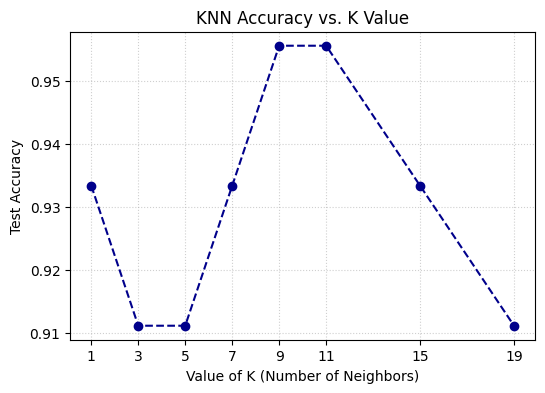

In [10]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='darkblue')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('Value of K (Number of Neighbors)')
plt.ylabel('Test Accuracy')
plt.xticks(k_values)
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

In [14]:
best_k = results_df['Accuracy'].idxmax()
best_accuracy = results_df['Accuracy'].max()
print(f"Optimal K: {best_k} with an Accuracy of {round(best_accuracy*100, 2)}%")

Optimal K: 9 with an Accuracy of 95.56%
